<a href="https://colab.research.google.com/github/albaqawih/LLM-projects/blob/main/LLM_Assessment_Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Agenda




### **A. Describe the Data (EDA)**

# 1. Load Data:
  - Load the dataset from a given URL.


# 2. Date Conversion and Distribution:
   - Convert 'publish_date' to a readable datetime format.
   - Analyze the distribution of publish dates over the years.

# 3. Identify Top Authors:
   - Identify top authors by counting the number of articles they published.

# 4. Key EDA Summary:
   - Summarize key metrics such as total rows, columns, unique values, missing data, duplicates, top authors, and publish date distribution.

# 5. Remove Duplicates:
   - Identify and remove exact duplicates based on 'title' and 'url'.

# 6. Analyze and Handle Remaining Duplicates:
   - Check for and display remaining duplicates by 'title'.
   - Print titles and corresponding URLs for any remaining duplicates.

# 7. Fill Missing Descriptions:
   - Use a text summarization pipeline to generate descriptions for missing 'description' fields based on 'full_text'.

# 8. Remove the 'description' Column:
   - Drop the 'description' column from the DataFrame because its data has been transferred to the 'new_description' column.

# 9. Compile EDA Summary:
 - Summarize key metrics such as total rows, columns, new descriptions, duplicate titles, duplicate URLs, and publish date new distribution.


# 10. Save and Inspect Cleaned Data:
   - Save the cleaned DataFrame and inspect it using df.info().


In [5]:
!pip install pandas

In [6]:
import pandas as pd

In [7]:
# @title ## 1. Load Data.
url='https://drive.google.com/file/d/1gl7WAkJr6Nyke7YckzXxdL-iM4UjhLGX/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

In [4]:
df

,_id,title,author,description,publish_date,full_text,url,categories
0,63927168098523fa9d5ef047,Are The Democrats Screwed In The Senate After ...,Nate Silver,\nAre The Democrats Screwed In The Senate Afte...,1.670516e+12,\n\n\n\n2028 Election\nAre The Democrats Screw...,https://fivethirtyeight.com/features/democrats...,['news']
1,652b21ec754471a9795c291a,Beyond the Narrative,Sam Freedman,NaN,1.697272e+12,We are told before every party conference that...,https://samf.substack.com/p/beyond-the-narrative,['news']
2,6529cfaff59ed61396db838c,Ballot Measures: A Preview,Walter Olson,NaN,1.697227e+12,Walter Olson Voters will go to the polls soon...,https://www.cato.org/blog/ballot-measures-preview,['news']
3,6529d030f59ed61396db8398,Trump’s Only Real Worldview Is Pettiness,David A. Graham,NaN,1.697214e+12,Let no one say that Donald Trump has lost his ...,"tag:theatlantic.com,2023:50-675637",['news']
4,6529d072f59ed61396db839e,The COVID Bailout of State and Local Governmen...,Eric Boehm,NaN,1.697212e+12,Two years after Congress authorized a h...,https://reason.com/2023/10/13/the-covid-bailou...,['news']
...,...,...,...,...,...,...,...,...
3322,611d886b3e00864ef8e3e1b0,The Opposite of Toxic Positivity,Scott Barry Kaufman,NaN,1.629284e+12,Countless books have been written on the “powe...,https://www.theatlantic.com/family/archive/202...,['news']
3323,611c537c2654b3ac01ebf2c0,Biden’s most heartless betrayal,Ayaan Hirsi Ali,America cares more about pronouns than the fat...,1.629242e+12,"“I’ve been clear,” President Joe Biden told th...",https://unherd.com/2021/08/bidens-most-heartle...,['news']
3324,611c537c2654b3ac01ebf2c1,Cuttlefish Break the Rules of Aging,Katherine J. Wu,"Unlike humans, these eight-armed creatures can...",1.629241e+12,"Cuttlefish, with their blimp-shaped bodies and...",https://www.theatlantic.com/science/archive/20...,['news']
3325,61159ee621e7fdae5c6a2fe7,How the Pandemic Now Ends,Ed Yong,Cases of COVID-19 are rising fast. Vaccine upt...,1.628766e+12,"In September 2020, just before COVID-19 began ...",https://www.theatlantic.com/health/archive/202...,['news']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3327 entries, 0 to 3326
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   _id           3327 non-null   object 
 1   title         3327 non-null   object 
 2   author        3327 non-null   object 
 3   description   1325 non-null   object 
 4   publish_date  3327 non-null   float64
 5   full_text     3327 non-null   object 
 6   url           3327 non-null   object 
 7   categories    3327 non-null   object 
dtypes: float64(1), object(7)
memory usage: 208.1+ KB


In [8]:
# @title # 2. Date Conversion and Distribution.

# Convert publish_date to a readable datetime format
df['publish_date_converted'] = pd.to_datetime(df['publish_date'], unit='ms')

# Distribution of publish_date over the years
publish_date_distribution = df['publish_date_converted'].dt.year.value_counts().sort_index()

In [9]:
# @title  # 3. Identify Top Authors.
# Top authors by article count
top_authors = df['author'].value_counts().head(10)

In [10]:
#@title  # 4. Key EDA Summary.
# This code summarizes key EDA metrics like unique values, duplicates, and missing data.


# Summary of EDA performed
eda_summary = {
    'Total Rows': df.shape[0],
    'Total Columns': df.shape[1],
    'Unique Titles': df['title'].nunique(),
    'Unique Authors': df['author'].nunique(),
    'Unique URLs': df['url'].nunique(),
    'Missing Descriptions': df['description'].isnull().sum(),
    'Duplicate Titles': df.duplicated(subset='title').sum(),
    'Duplicate URLs': df.duplicated(subset='url').sum(),
    'Top Authors': top_authors.to_dict(),
    'Publish Date Distribution': publish_date_distribution.to_dict()
}

# Creating a DataFrame from the EDA summary
summary_df = pd.DataFrame.from_dict(eda_summary, orient='index', columns=['Value'])

# Displaying the summary DataFrame as a table
summary_df


,Value
Total Rows,3327
Total Columns,9
Unique Titles,3269
Unique Authors,544
Unique URLs,3275
Missing Descriptions,2002
Duplicate Titles,58
Duplicate URLs,52
Top Authors,"{'Katherine J. Wu': 115, 'Emma Camp': 111, 'Co..."
Publish Date Distribution,"{2021: 686, 2022: 1429, 2023: 1212}"


In [11]:
#@title # 5. Remove Duplicates.
# Display the rows that have duplicate titles
duplicate_titles_df = df[df.duplicated(subset='title', keep=False)]
duplicate_titles_df.head()

,_id,title,author,description,publish_date,full_text,url,categories,publish_date_converted
33,65233925123122e765958c03,Quillette Weekly,Claire Lehmann,NaN,1.696739e+12,A young woman is pulled by the hair and shoved...,https://quillette.com/2023/10/08/quillette-wee...,['news'],2023-10-08 04:24:02
78,651df54280a3a98a88bae39b,The Insidious Lie That We Can’t Understand Eac...,Yascha Mounk,And a guide for how to productively push back ...,1.696392e+12,A novel ideology is haunting America. Over a s...,https://quillette.com/2023/10/04/the-insidious...,['news'],2023-10-04 04:00:16
80,651ca0aee176228ae6543d16,Why Obama’s “Car Czar” Thinks Biden Should Sta...,Isaac Chotiner,NaN,1.696363e+12,"Last Tuesday, President Biden joined members o...",https://www.newyorker.com/news/q-and-a/why-oba...,['news'],2023-10-03 19:52:52
81,651ca0b9e176228ae6543d17,Why Obama’s “Car Czar” Thinks Biden Should Sta...,Isaac Chotiner,NaN,1.696363e+12,"Last Tuesday, President Biden joined members o...",https://www.newyorker.com/news/q-and-a/why-oba...,['news'],2023-10-03 19:52:52
82,651df3d480a3a98a88bae36a,The Insidious Lie That We Can’t Understand Eac...,Yascha Mounk,NaN,1.696361e+12,"(Klaus Vedfelt via Getty Images.)Today, we’re ...",https://www.persuasion.community/p/the-insidio...,['news'],2023-10-03 19:29:32


In [12]:
# Display the rows that have duplicate URLs
duplicate_urls_df = df[df.duplicated(subset='url', keep=False)]
duplicate_urls_df.head()

,_id,title,author,description,publish_date,full_text,url,categories,publish_date_converted
80,651ca0aee176228ae6543d16,Why Obama’s “Car Czar” Thinks Biden Should Sta...,Isaac Chotiner,NaN,1.696363e+12,"Last Tuesday, President Biden joined members o...",https://www.newyorker.com/news/q-and-a/why-oba...,['news'],2023-10-03 19:52:52
81,651ca0b9e176228ae6543d17,Why Obama’s “Car Czar” Thinks Biden Should Sta...,Isaac Chotiner,NaN,1.696363e+12,"Last Tuesday, President Biden joined members o...",https://www.newyorker.com/news/q-and-a/why-oba...,['news'],2023-10-03 19:52:52
114,65175ca2b71551ad482f362b,The Violent End of Nagorno-Karabakh’s Fight fo...,Masha Gessen,NaN,1.695982e+12,A thirty-five-year war reignited last week. Hu...,https://www.newyorker.com/news/our-columnists/...,['news'],2023-09-29 10:00:00
115,65175cbdb71551ad482f3630,The Violent End of Nagorno-Karabakh’s Fight fo...,Masha Gessen,NaN,1.695982e+12,A thirty-five-year war reignited last week. Hu...,https://www.newyorker.com/news/our-columnists/...,['news'],2023-09-29 10:00:00
123,65160b66535feaf311f9086c,Peter Daou’s Theory of Election Interference—b...,Isaac Chotiner,NaN,1.695895e+12,"Peter Daou, a former aide to Hillary Clinton, ...",https://www.newyorker.com/news/q-and-a/peter-d...,['news'],2023-09-28 10:00:00


The following code identifies and removes exact duplicates based on all columns in a DataFrame, keeping only unique entries, and then displays the cleaned DataFrame's information.

In [13]:
#This code identifies and removes exact duplicates based on all columns in a DataFrame,
# keeping only unique entries, and then displays the cleaned DataFrame's information.


# Identify duplicates based on 'title' and 'url'
potential_duplicates = df[df.duplicated(subset=['title', 'url'], keep=False)]

# Compare all columns for these potential duplicates to see if they are truly identical
duplicates_to_remove = potential_duplicates.groupby(['title', 'url']).filter(lambda x: x.nunique().sum() == len(x.columns))

# Remove the truly identical duplicates
df_cleaned = df.drop(duplicates_to_remove.index)

# Check the result
df_cleaned_info = df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3243 entries, 0 to 3326
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   _id                     3243 non-null   object        
 1   title                   3243 non-null   object        
 2   author                  3243 non-null   object        
 3   description             1325 non-null   object        
 4   publish_date            3243 non-null   float64       
 5   full_text               3243 non-null   object        
 6   url                     3243 non-null   object        
 7   categories              3243 non-null   object        
 8   publish_date_converted  3243 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 253.4+ KB


In [14]:
#@title # 6. Analyze and Handle Remaining Duplicates.

#This code removes duplicates based on title and url,checks for
#remaining duplicates by title, and displays the first 50 entries for review.



# Remove duplicates where both title and URL are identical
df_final_cleaned = df.drop_duplicates(subset=['title', 'url'], keep='first')

# Check if the duplicates are removed by re-running the inspection code
duplicate_titles_final = df_final_cleaned[df_final_cleaned.duplicated(subset=['title'], keep=False)]

# Print titles and corresponding URLs for any remaining duplicates
output_final_duplicates = []
for title in duplicate_titles_final['title'].unique():
    subset = duplicate_titles_final[duplicate_titles_final['title'] == title]
    output_final_duplicates.append(f"Title: {title}")
    for url in subset['url']:
        output_final_duplicates.append(f"  URL: {url}")
    output_final_duplicates.append("----")

# Show the result
output_final_duplicates[:50]  # Displaying only the first few results for brevity

['Title: Quillette Weekly',
 '  URL: https://quillette.com/2023/10/08/quillette-weekly-08-10-23/',
 '  URL: https://quillette.com/2023/09/24/quillette-weekly-24-09-23/',
 '  URL: https://quillette.com/2022/09/19/quillette-weekly-19-september-2022/',
 '----',
 'Title: The Insidious Lie That We Can’t Understand Each Other',
 '  URL: https://quillette.com/2023/10/04/the-insidious-lie-that-we-cant-understand-each-other/',
 '  URL: https://www.persuasion.community/p/the-insidious-lie-that-we-cant-understand',
 '----',
 'Title: With DeSantis Reeling, What About Tim Scott?',
 '  URL: https://www.nytimes.com/2023/07/29/opinion/tim-scott-desantis-trump.html',
 '  URL: https://www.nytimes.com/2023/07/29/opinion/columnists/tim-scott-desantis-trump.html',
 '----',
 'Title: Letters to the editor',
 '  URL: https://www.economist.com/letters/2022/05/14/letters-to-the-editor',
 '  URL: https://www.economist.com/letters/2022/04/30/letters-to-the-editor',
 '  URL: https://www.economist.com/letters/2022/

In [15]:
df_final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 0 to 3326
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   _id                     3275 non-null   object        
 1   title                   3275 non-null   object        
 2   author                  3275 non-null   object        
 3   description             1317 non-null   object        
 4   publish_date            3275 non-null   float64       
 5   full_text               3275 non-null   object        
 6   url                     3275 non-null   object        
 7   categories              3275 non-null   object        
 8   publish_date_converted  3275 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 255.9+ KB


In [16]:
#@title # 7. Fill Missing Descriptions.

#The follwing code initializes a text summarization pipeline to fill in missing
#descriptions in a DataFrame. If a description is missing,
# it generates a summary from the full_text using the pipeline,
# or provides a fallback if the text is too short or summarization fails.
# This process ensures that all entries have a description, either generated
# or based on available text.

from transformers import pipeline


# Initialize the summarization pipeline
summarizer = pipeline("summarization", model="mrm8488/bert-mini2bert-mini-finetuned-cnn_daily_mail-summarization")

# Function to fill missing descriptions with a robust summarization process
def fill_missing_descriptions(row):
    if pd.isna(row['description']):
        if isinstance(row['full_text'], str) and row['full_text'].strip():
            text_to_summarize = row['full_text'].strip()

            # Ensure the text is long enough for summarization
            if len(text_to_summarize.split()) < 10:  # Short texts might not summarize well
                text_to_summarize = text_to_summarize + " " + text_to_summarize  # Repeat the text to make it longer

            try:
                # Summarize the full_text
                summary = summarizer(text_to_summarize, max_length=50, min_length=10, do_sample=False)[0]['summary_text']
                return summary
            except Exception as e:
                return text_to_summarize[:50]  # Fallback: take the first 50 characters as a "summary"
        else:
            return "No valid text available for summarization"
    else:
        return row['description']



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/3.63k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/93.7M [00:00<?, ?B/s]

In [17]:
# Apply the function to create the new_description column
df_final_cleaned['new_description'] = df_final_cleaned.apply(fill_missing_descriptions, axis=1)

# Show the first few rows of the updated DataFrame
df_final_cleaned[['title', 'description', 'new_description']].head(25)


<ipython-input-17-439957788963>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final_cleaned['new_description'] = df_final_cleaned.apply(fill_missing_descriptions, axis=1)


,title,description,new_description
0,Are The Democrats Screwed In The Senate After ...,\nAre The Democrats Screwed In The Senate Afte...,\nAre The Democrats Screwed In The Senate Afte...
1,Beyond the Narrative,NaN,We are told before every party conference that...
2,Ballot Measures: A Preview,NaN,Walter Olson Voters will go to the polls soon...
3,Trump’s Only Real Worldview Is Pettiness,NaN,Let no one say that Donald Trump has lost his ...
4,The COVID Bailout of State and Local Governmen...,NaN,Two years after Congress authorized a hugely e...
5,1 Million Told To Flee,NaN,Israel tells one million people to flee Gaza: ...
6,Inflation Won't Go Away Until Congress Gets th...,NaN,Inflation has fallen from the shocking highs t...
7,The Israeli Crisis Is Testing Biden’s Core For...,NaN,President Joe Biden’s core foreign-policy argu...
8,Darkest Hours,NaN,"Ground invasion looking likely: ""Every Hamas m..."
9,Why the Most Successful Marriages Are Start-Up...,NaN,Want to stay current with Arthur’s writing? Si...


In [18]:
#@title # 8. Remove the 'description' Column.

df_final_cleaned = df_final_cleaned.drop(columns=['description'])

In [17]:
df_final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3275 entries, 0 to 3326
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   _id                     3275 non-null   object        
 1   title                   3275 non-null   object        
 2   author                  3275 non-null   object        
 3   publish_date            3275 non-null   float64       
 4   full_text               3275 non-null   object        
 5   url                     3275 non-null   object        
 6   categories              3275 non-null   object        
 7   publish_date_converted  3275 non-null   datetime64[ns]
 8   new_description         3275 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 255.9+ KB


The new_description column has **3,275 non-null text entries**, indicating *successful filling* of missing descriptions.

In [19]:
#@title # 9. Compile EDA Summary.

# Summary of EDA performed on the cleaned data
eda_summary_cleaned = {
    'Total Rows': df_final_cleaned.shape[0],
    'Total Columns': df_final_cleaned.shape[1],
    'New Descriptions': df_final_cleaned['new_description'].notnull().sum(),
    'Duplicate Titles': df_final_cleaned.duplicated(subset='title').sum(),
    'Duplicate URLs': df_final_cleaned.duplicated(subset='url').sum(),
    'Publish Date Distribution': df_final_cleaned['publish_date_converted'].dt.year.value_counts().sort_index().to_dict()
}

# Creating a DataFrame from the EDA summary
summary_df_final_cleaned = pd.DataFrame.from_dict(eda_summary_cleaned, orient='index', columns=['Value'])

# Displaying the summary DataFrame as a table
summary_df_final_cleaned


,Value
Total Rows,3275
Total Columns,9
New Descriptions,3275
Duplicate Titles,6
Duplicate URLs,0
Publish Date Distribution,"{2021: 686, 2022: 1408, 2023: 1181}"


In [19]:
df_final_cleaned.head()

,_id,title,author,publish_date,full_text,url,categories,publish_date_converted,new_description
0,63927168098523fa9d5ef047,Are The Democrats Screwed In The Senate After ...,Nate Silver,1.670516e+12,\n\n\n\n2028 Election\nAre The Democrats Screw...,https://fivethirtyeight.com/features/democrats...,['news'],2022-12-08 16:05:35,\nAre The Democrats Screwed In The Senate Afte...
1,652b21ec754471a9795c291a,Beyond the Narrative,Sam Freedman,1.697272e+12,We are told before every party conference that...,https://samf.substack.com/p/beyond-the-narrative,['news'],2023-10-14 08:31:00,We are told before every party conference that...
2,6529cfaff59ed61396db838c,Ballot Measures: A Preview,Walter Olson,1.697227e+12,Walter Olson Voters will go to the polls soon...,https://www.cato.org/blog/ballot-measures-preview,['news'],2023-10-13 19:48:24,Walter Olson Voters will go to the polls soon...
3,6529d030f59ed61396db8398,Trump’s Only Real Worldview Is Pettiness,David A. Graham,1.697214e+12,Let no one say that Donald Trump has lost his ...,"tag:theatlantic.com,2023:50-675637",['news'],2023-10-13 16:15:32,Let no one say that Donald Trump has lost his ...
4,6529d072f59ed61396db839e,The COVID Bailout of State and Local Governmen...,Eric Boehm,1.697212e+12,Two years after Congress authorized a h...,https://reason.com/2023/10/13/the-covid-bailou...,['news'],2023-10-13 15:45:17,Two years after Congress authorized a hugely e...


In [20]:
#@title # 10. Save and Inspect Cleaned Data.

#Save the clean data
df_final_cleaned.to_csv('df_final_cleaned.csv', index=False)

#

 ### B. Build a Search Engine

In [21]:
!pip install sentence-transformers

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [22]:
#@title # 1.Combining Text Fields and Chunking Text.
# Combine 'title' and 'full_text' columns into one column
df_final_cleaned['combined'] = df_final_cleaned['title'].fillna('') + ' ' + df_final_cleaned['full_text'].fillna('')

# Simple chunking function to divide text into chunks of a specified size
def simple_chunking(text, max_chunk_size=300):
    words = text.split()
    return [' '.join(words[i:i + max_chunk_size]) for i in range(0, len(words), max_chunk_size)]

# Apply chunking to the 'combined' column
df_final_cleaned['chunks'] = df_final_cleaned['combined'].apply(simple_chunking)


In [23]:
#@title # 2. Embedding Text.

from sentence_transformers import SentenceTransformer
import numpy as np

# Load the model for embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')  # A good balance of speed and accuracy

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [24]:
#@title # Generate embeddings for each chunk

embeddings = []
for chunk_list in df_final_cleaned['chunks']:
    chunk_embeddings = model.encode(chunk_list, convert_to_tensor=False)
    embeddings.append(chunk_embeddings)

# Convert embeddings list to a NumPy array
# If each chunk has a different number of embeddings, it would be a list of arrays instead of a NumPy array
embeddings = np.array(embeddings, dtype=object)

In [41]:


# Flatten the list of embeddings
flattened_embeddings = []
for chunk_list in embeddings:
    for chunk_embedding in chunk_list:
        flattened_embeddings.append(chunk_embedding)

# Convert to a NumPy array and ensure float32 format
flattened_embeddings = np.array(flattened_embeddings, dtype=np.float32)

# Store the embeddings in the DataFrame
df_final_cleaned['embeddings'] = list(embeddings)


In [25]:
!pip install faiss-cpu

In [26]:
!pip install faiss-gpu

In [52]:
#@title # 3.Clustering with FAISS.
#FAISS is a library for efficient similarity searches.
# Here, FAISS is used for clustering the embeddings into 5 clusters.
#Each embedding is assigned to a cluster based on its proximity to cluster centroids.


import faiss
import numpy as np
from sentence_transformers import SentenceTransformer

# Step 2: Aggregate embeddings by averaging across chunks
# This ensures that each document gets a single vector representation
aggregated_embeddings = [np.mean(chunk_embeds, axis=0) for chunk_embeds in embeddings]

# Convert the aggregated embeddings into a 2D NumPy array
aggregated_embeddings = np.vstack(aggregated_embeddings).astype(np.float32)

# Step 3: Perform FAISS K-means clustering

# Number of clusters
num_clusters = 5

# Dimensions of the embeddings (number of columns in the embeddings matrix)
d = aggregated_embeddings.shape[1]

# Initialize FAISS Kmeans clustering object
kmeans = faiss.Kmeans(d, num_clusters, niter=20, verbose=True)

# Train the Kmeans model on the embeddings
kmeans.train(aggregated_embeddings)

# Step 4: Assign clusters
_, cluster_labels = kmeans.index.search(aggregated_embeddings, 1)

# Flatten the cluster labels array
cluster_labels = cluster_labels.flatten()

# Step 5: Add the cluster labels to your DataFrame
df_final_cleaned['cluster'] = cluster_labels

# Optionally, print the cluster assignments to verify
print(df_final_cleaned[['title', 'new_description']].head())

                                               title  \
0  Are The Democrats Screwed In The Senate After ...   
1                               Beyond the Narrative   
2                         Ballot Measures: A Preview   
3           Trump’s Only Real Worldview Is Pettiness   
4  The COVID Bailout of State and Local Governmen...   

                                     new_description  
0  \nAre The Democrats Screwed In The Senate Afte...  
1  We are told before every party conference that...  
2  Walter Olson  Voters will go to the polls soon...  
3  Let no one say that Donald Trump has lost his ...  
4  Two years after Congress authorized a hugely e...  


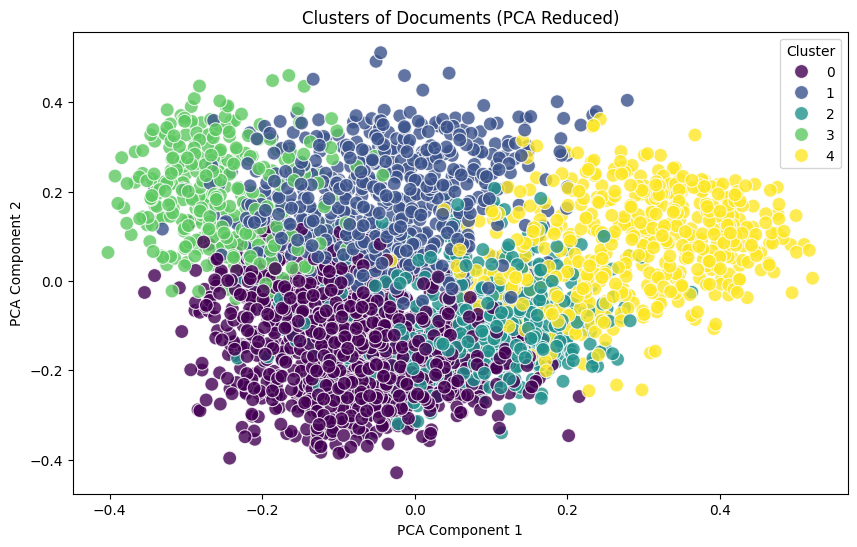

In [53]:
#@title PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Step 1: Reduce the dimensionality of the aggregated embeddings to 2 dimensions using PCA
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(aggregated_embeddings)

# Step 2: Add the reduced dimensions to the DataFrame
df_final_cleaned['pca_x'] = reduced_embeddings[:, 0]
df_final_cleaned['pca_y'] = reduced_embeddings[:, 1]

# Step 3: Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca_x', y='pca_y', hue='cluster', data=df_final_cleaned, palette='viridis', s=100, alpha=0.8)

# Add labels and title
plt.title('Clusters of Documents (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()


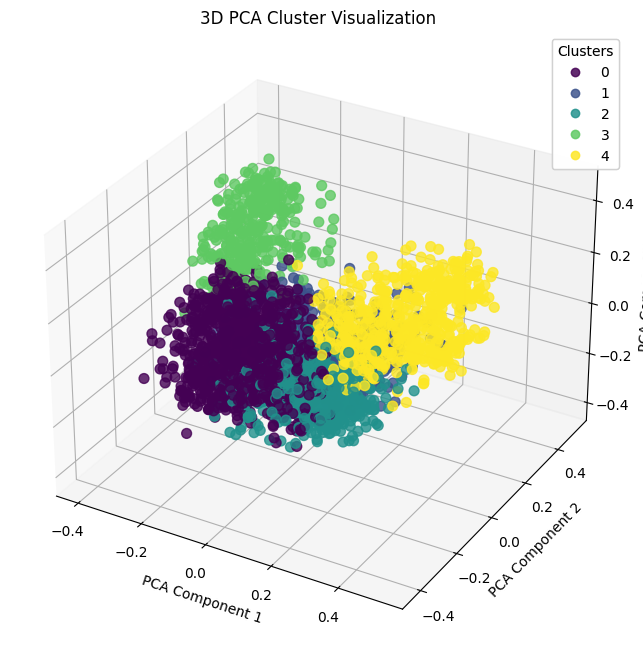

In [56]:
# Step 1: Reduce the dimensionality of the aggregated embeddings to 3 dimensions using PCA
pca = PCA(n_components=3)
reduced_embeddings_3d = pca.fit_transform(aggregated_embeddings)

# Step 2: Add the reduced dimensions to the DataFrame
df_final_cleaned['pca_x'] = reduced_embeddings_3d[:, 0]
df_final_cleaned['pca_y'] = reduced_embeddings_3d[:, 1]
df_final_cleaned['pca_z'] = reduced_embeddings_3d[:, 2]

# Step 3: Create a 3D scatter plot for the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the clusters in 3D
scatter = ax.scatter(
    df_final_cleaned['pca_x'],
    df_final_cleaned['pca_y'],
    df_final_cleaned['pca_z'],
    c=df_final_cleaned['cluster'],
    cmap='viridis',
    s=50,
    alpha=0.8
)

# Add labels and title
ax.set_title('3D PCA Cluster Visualization')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')

# Add a color bar to show cluster colors
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

# Show the plot
plt.show()

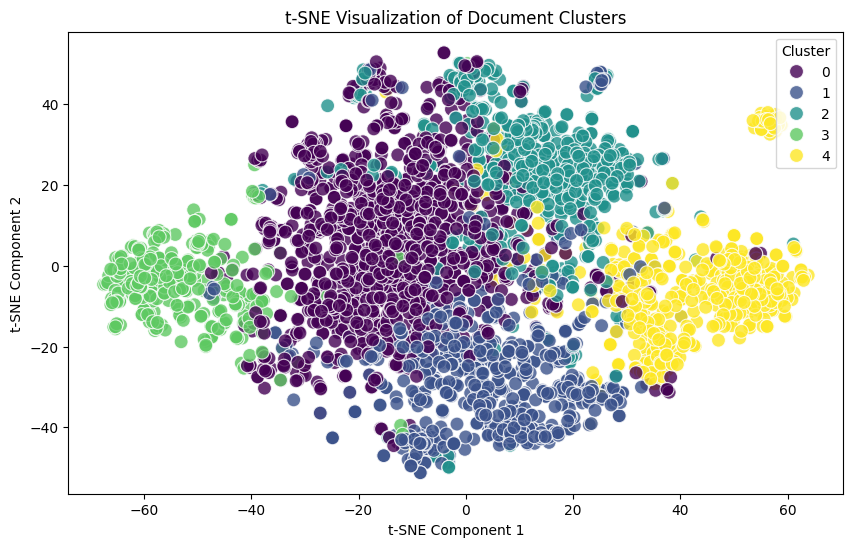

In [57]:
#@title # 4. t-SNE Visualization
#t-SNE is a dimensionality reduction technique used here
#to map the high-dimensional embeddings into a 2D space for visualization.
# This helps us understand how articles are grouped in terms of similarity.

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Apply t-SNE to reduce embeddings to 2 dimensions
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
reduced_embeddings_tsne = tsne.fit_transform(aggregated_embeddings)

# Step 2: Add the t-SNE reduced dimensions to the DataFrame
df_final_cleaned['tsne_x'] = reduced_embeddings_tsne[:, 0]
df_final_cleaned['tsne_y'] = reduced_embeddings_tsne[:, 1]

# Step 3: Plot the t-SNE result
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne_x', y='tsne_y', hue='cluster', data=df_final_cleaned, palette='viridis', s=100, alpha=0.8)

# Add labels and title
plt.title('t-SNE Visualization of Document Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', loc='upper right')
plt.show()


In [59]:


# Step 1: Combine text from multiple columns (e.g., 'title', 'full_text', 'author')
df_final_cleaned['combined_text'] = (
    df_final_cleaned['title'].fillna('') + ' ' +
    df_final_cleaned['author'].fillna('') + ' ' +
    df_final_cleaned['full_text'].fillna('') + ' ' +
    df_final_cleaned['new_description'].fillna('')
)

In [60]:

# Generate embeddings for the combined text
combined_embeddings = model.encode(df_final_cleaned['combined_text'].tolist(), convert_to_tensor=False)


In [63]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.2/93.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: tomlkit
    Found existing installation: tomlkit 0.13.0
    Uninstalling tomlkit-0.13.0:
      Successfully uninstalled tomlkit-0.13.0


In [65]:
!pip install faiss-cpu sentence-transformers

In [69]:
import gradio as gr


# Step 3: Create a FAISS index for efficient search
d = combined_embeddings.shape[1]  # Dimension of the embeddings
index = faiss.IndexFlatL2(d)  # Use L2 distance for the index
index.add(np.array(combined_embeddings, dtype=np.float32))  # Add embeddings to the FAISS index

# Function to handle the search in Gradio
def search(query):
    try:
        # Generate query embedding
        query_embedding = model.encode(query, convert_to_tensor=False)

        # Ensure query embedding is in the correct shape for FAISS search
        query_embedding = np.array([query_embedding], dtype=np.float32)  # Add batch dimension

        # Search for the top 5 closest documents in the FAISS index
        D, I = index.search(query_embedding, k=5)

        # Retrieve the relevant documents based on the indices
        retrieved_docs = [df_final_cleaned['combined_text'].iloc[i] for i in I.flatten()]

        # Return the retrieved documents as a single string
        return "\n\n".join(retrieved_docs)

    except Exception as e:
        return str(e)  # Return the error message for debugging

# Set up the Gradio interface
gradio_interface = gr.Interface(
    fn=search,  # Function to be executed on input
    inputs="text",  # Input: Text field for the query
    outputs="text",  # Output: Text area for displaying results
    title="FAISS Document Search",
    description="Enter a search query to retrieve the top 5 relevant documents."
)

# Launch the Gradio app
gradio_interface.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://0e41476eda971d7c27.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [71]:
!pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 361.5/361.5 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 14.6 MB/s eta 0:00:00


In [81]:
pip install openai gradio faiss-cpu sentence-transformers pandas numpy

### C. Build RAG Model Using OpenAI and Ollama

In [99]:
import openai
import gradio as gr
import faiss
import numpy as np
import pandas as pd


openai.api_key = "open_api_key"

In [106]:
# Step 7: Define a function to retrieve relevant documents using FAISS
def retrieve_documents(query, k=5):
    query_embedding = model.encode(query)
    D, I = index.search(np.array([query_embedding], dtype=np.float32), k=k)
    retrieved_docs = df_final_cleaned.iloc[I[0]].copy()
    context = "\n\n".join(retrieved_docs['combined_text'])
    return context, retrieved_docs

# Step 8: Define the function to generate responses using OpenAI GPT
def rag_generate(query):
    context, _ = retrieve_documents(query)
    response = openai.ChatCompletion.create(
        model="gpt-3.5-turbo",  # or "gpt-4"
        messages=[
            {"role": "system", "content": "You are a helpful assistant."},
            {"role": "user", "content": f"Based on the following context:\n{context}\n\nAnswer the query: {query}"}
        ]
    )
    return response['choices'][0]['message']['content']

# Step 9: Define the Gradio interface
demo = gr.Interface(fn=rag_generate, inputs="text", outputs="text")

# Step 10: Launch Gradio app
demo.launch(share=True, debug=False)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://bc53126b87ee1391d1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [ ]:
# Step 4: (Optional) Use Ollama for comparison or further generation
# Assuming Ollama has a similar API
import ollama

ollama.api_key = "OLLAMA_API_KEY"

ollama_response = ollama.generate(
    prompt=f"Context: {context}\n\nQuestion: {query}",
    max_tokens=200
)

# Print the response from Ollama
print(ollama_response)
